In [14]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [15]:
#Importing Dataset
spotify = pd.read_csv('data.csv')
X= spotify.iloc[:,:-1].values
y= spotify.iloc[:,:10].values
spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


<AxesSubplot:>

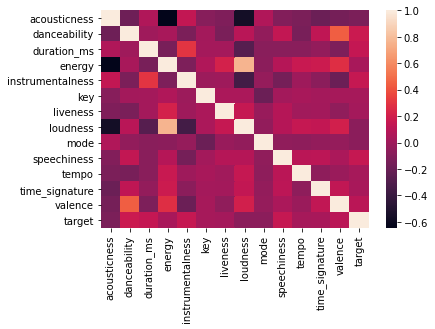

In [16]:
#Data Visualisation
#Correlation Matrix
sns.heatmap(spotify.corr())

In [17]:
#Encoding categorical data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
ohe = preprocessing.OneHotEncoder(sparse= [3])
X = ohe.fit_transform(X).toarray()
print(X)
#Avoiding Dummy Variable Trap
X=X[:, 1:]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [19]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Text(0.5, 0, 'Y Test')

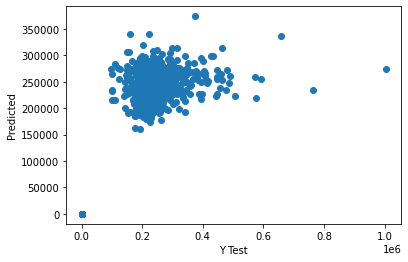

In [20]:
# Predicting and Creating a scatterplot
pred= regressor.predict(X_test)
plt.scatter(y_test, pred)
plt.ylabel("Predicted")
plt.xlabel('Y Test')

In [21]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[[ 1.99530722e-01  6.71549748e-01  3.07373044e+05 ... -7.78712500e+00
   6.92358207e-03  8.18260428e-02]
 [ 8.22630157e-02  6.99066371e-01  2.57696742e+05 ... -5.80010801e+00
   8.95778042e-03  7.96718436e-02]
 [ 1.73293203e-01  6.48692938e-01  2.38745262e+05 ... -6.74669438e+00
   9.94660620e-01  8.41101260e-02]
 ...
 [ 1.45613652e-01  5.50121243e-01  2.34281934e+05 ... -5.78573037e+00
   9.94064832e-01  1.08597848e-01]
 [ 8.55306168e-02  6.35923817e-01  2.11872968e+05 ... -5.96364706e+00
   9.99682727e-01  6.83559417e-02]
 [ 1.93129395e-01  6.17296939e-01  2.48615787e+05 ... -7.54951073e+00
   9.94082633e-01  6.12442435e-02]]


In [22]:
#Calculating Coefficients
print(regressor.coef_)

[[-1.51705987e-02  7.32088937e-04 -7.43898323e-05 ...  0.00000000e+00
   4.29833379e-02  0.00000000e+00]
 [-5.92870044e-03 -1.50342186e-02  1.52767368e-03 ...  0.00000000e+00
   1.83477419e-02  0.00000000e+00]
 [-2.35506263e+03  6.52154893e+02 -6.62674856e+01 ...  0.00000000e+00
  -1.22586225e+03  0.00000000e+00]
 ...
 [ 6.17534834e-02 -5.22381636e-02  5.30808216e-03 ...  0.00000000e+00
  -5.68921751e-01  0.00000000e+00]
 [ 7.20721986e-04  7.37360287e-04 -7.49254705e-05 ...  0.00000000e+00
   5.81833581e-04  0.00000000e+00]
 [-1.06042375e-03 -2.19313459e-03  2.22851222e-04 ...  0.00000000e+00
   5.79399298e-04  0.00000000e+00]]


In [23]:
#Calculating the intercept
print(regressor.intercept_)

[ 3.05727435e-01  5.37721640e-01  2.62721813e+05  5.69188354e-01
  2.17409015e-01  5.49695046e+00  2.02051732e-01 -9.14876294e+00
  5.00160407e-01  9.63698560e-02]


In [24]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.316466872842165